In [1]:
import pandas as pd
import os
import openpyxl
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


Load Data Frame and append all sheets to one

In [2]:
# Reload the Excel file to ensure the most recent upload is used
file_path = 'Copy of HAB Research database.xlsx'
excel_data = pd.ExcelFile(file_path)

# Read all sheets into a dictionary of DataFrames
all_sheets = {sheet_name: excel_data.parse(sheet_name) for sheet_name in excel_data.sheet_names}

# Combine all sheets into one DataFrame
combined_data = pd.concat(all_sheets.values(), ignore_index=True)

# Save the combined data to a CSV file



## Data Preprocessing

Filter all data and remove any unecessary metrics

In [3]:
# Correct the filtering process to ensure all rows containing "(Raw score)" or "(raw score)" are removed.
filtered_data = combined_data[~combined_data['Participant #'].str.contains(r'\(Raw score\)|\(raw score\)', na=False)]

# List of metrics to remove
metrics_to_remove = [
    'PlayAttention Points', 'Subjective sleep quality', 'Sleep latency',
    'Sleep duration', 'Sleep efficiency', 'Sleep disturbance', 'Use of sleep medication',
    'Daytime disturbance', 'Agreeableness', 'Extraversion', 'Openness', '2 feet errors (eyes open)',
    'tandem errors', '1 foot errors', '2 feet Eyes closed errors', 'tandem Eyes closed errors',
    '1 foot Eyes closed errors'
]

# Remove rows where the "Participant #" column matches any of the metrics to remove
filtered_data = filtered_data[~filtered_data['Participant #'].isin(metrics_to_remove)]

# Save the filtered data to a new CSV file
filtered_csv_path = 'cleaned_data2.csv'
filtered_data.to_csv(filtered_csv_path, index=False)

filtered_data


,Participant #,100,101,102,103,104,105,106,Unnamed: 8,200,...,1505,1506,Unnamed: 120,1600,1601,1602,1603,1604,1605,1606
0,Metric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Creyos Cognitive score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Creyos monkey ladder (Age matched score),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Creyos monkey ladder (Percentile),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Creyos monkey ladder (Percentile),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Changes after vagus basic exercise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,Grip Strength (KG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,R hand average strength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
unique_values_first_column = filtered_data['Participant #'].unique()
#unique_values_first_column

In [5]:
# Load the previously saved cleaned data CSV file
filtered_csv_path = 'cleaned_data2.csv'
filtered_data = pd.read_csv(filtered_csv_path)

# Transpose the DataFrame
transposed_data = filtered_data.transpose()

# Add 'Participant #' as the first column name
transposed_data.columns = transposed_data.iloc[0]
transposed_data = transposed_data.drop(transposed_data.index[0])
transposed_data.reset_index(inplace=True)
transposed_data.rename(columns={'index': 'Participant #'}, inplace=True)

transposed_data = transposed_data.dropna(how='all', subset=transposed_data.columns[1:])

transposed_data = transposed_data.dropna(axis=1, how='all')

transposed_data = transposed_data.dropna(subset=['Creyos monkey ladder (Age matched score)'])


# Save the transposed data to a new CSV file
transposed_csv_path = 'data_transposed.csv'
transposed_data.to_csv(transposed_csv_path, index=False)


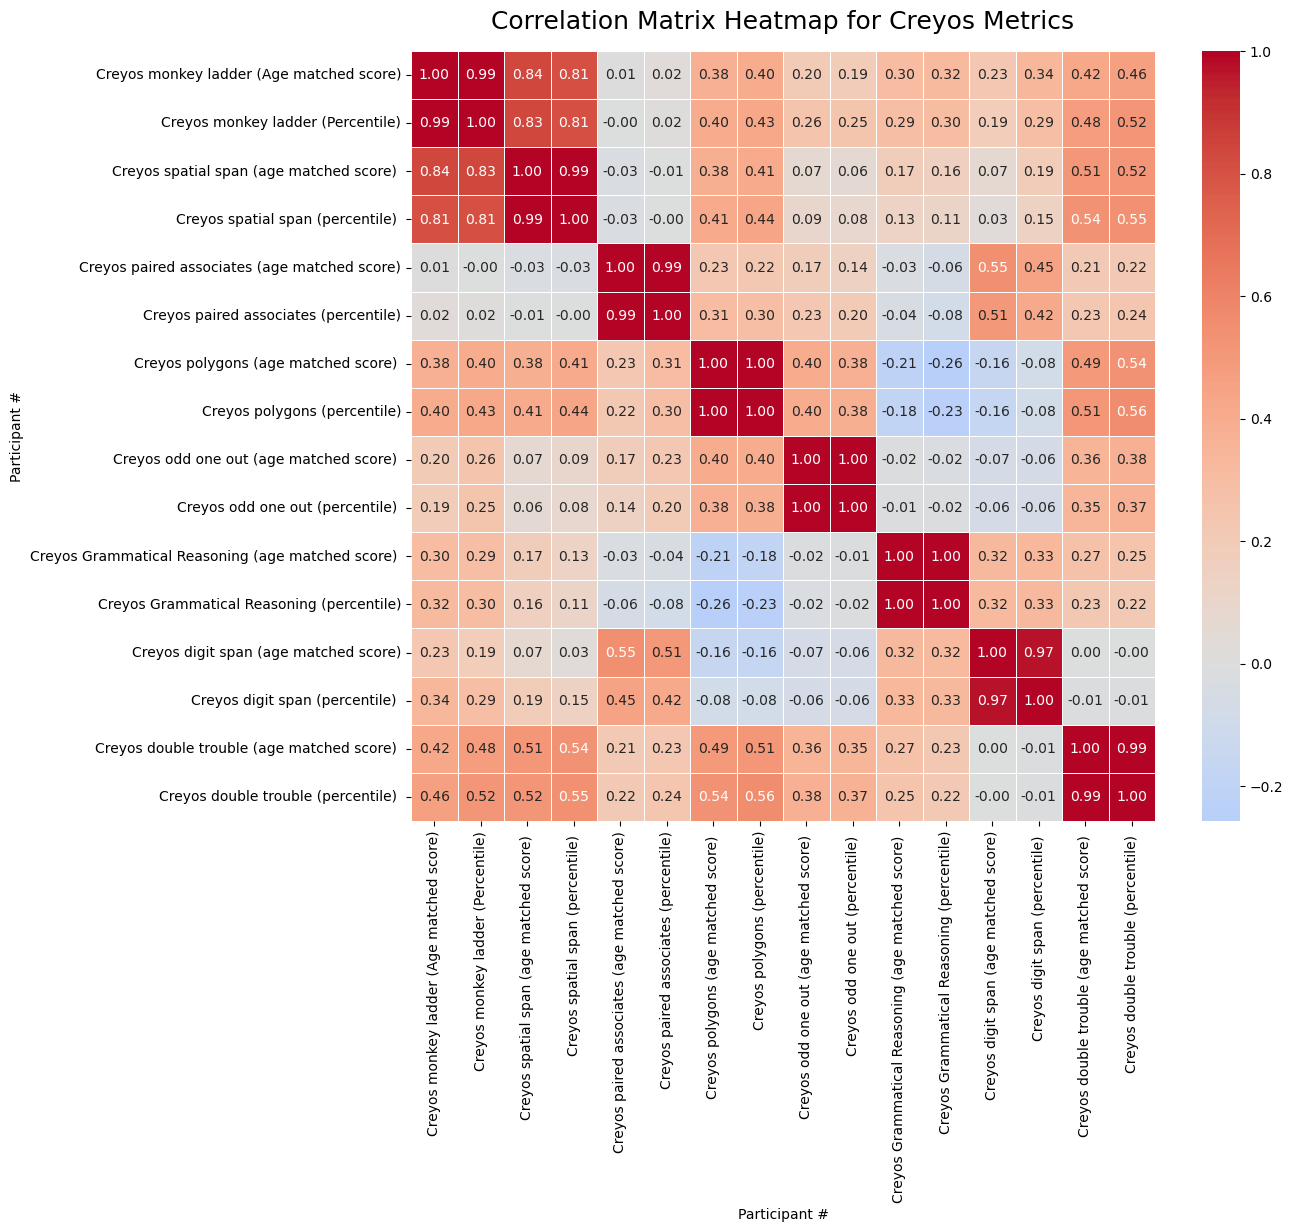

In [6]:
#take a snippet of the transposed data to see the creyos correlations

filtered_data= transposed_data
filtered_data.columns = filtered_data.columns.astype(str)

# Filter the DataFrame to include only columns with "Creyos" in the name
creyos_columns = [col for col in filtered_data.columns if "Creyos" in col]
filtered_creyos_data = filtered_data[creyos_columns]

# Convert columns to numeric
filtered_creyos_data = filtered_creyos_data.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = filtered_creyos_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5, fmt='.2f')
heatmap.set_title('Correlation Matrix Heatmap for Creyos Metrics', fontdict={'fontsize': 18}, pad=16)

# Show the plot
plt.show()

In [7]:
transposed_data.columns = transposed_data.columns.astype(str)

# Calculate the correlation matrix for columns with 'Creyos' in the name
creyos_columns = [col for col in transposed_data.columns if "Creyos" in col]
filtered_creyos_data = transposed_data[creyos_columns].apply(pd.to_numeric, errors='coerce')
correlation_matrix = filtered_creyos_data.corr()

# Identify sets of highly correlated columns
correlation_threshold = 0.75
columns_to_retain = set(correlation_matrix.columns)
columns_to_remove = set()

for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if col != idx and abs(correlation_matrix.at[idx, col]) > correlation_threshold:
            if col in columns_to_retain and idx in columns_to_retain:
                # Keep only one column from the set
                columns_to_retain.discard(idx)
                columns_to_remove.add(idx)

# Drop the identified columns from the transposed data
transposed_data_cleaned = transposed_data.drop(columns=columns_to_remove, errors='ignore')

# Save the updated transposed DataFrame to a new CSV file
updated_transposed_csv_path = 'cleaned_data4.csv'
transposed_data_cleaned.to_csv(updated_transposed_csv_path, index=False)

print(f"Columns removed due to multicollinearity: {columns_to_remove}")
print(f"Columns retained: {columns_to_retain}")
print(f"Cleaned transposed data saved to {updated_transposed_csv_path}")

data=transposed_data_cleaned

Columns removed due to multicollinearity: {'Creyos Grammatical Reasoning (percentile)', 'Creyos spatial span (percentile) ', 'Creyos paired associates (percentile)', 'Creyos polygons (percentile)', 'Creyos monkey ladder (Percentile)', 'Creyos spatial span (age matched score) ', 'Creyos double trouble (percentile) ', 'Creyos odd one out (percentile) ', 'Creyos digit span (percentile) '}
Columns retained: {'Creyos paired associates (age matched score)', 'Creyos polygons (age matched score) ', 'Creyos digit span (age matched score)', 'Creyos odd one out (age matched score) ', 'Creyos double trouble (age matched score) ', 'Creyos monkey ladder (Age matched score)', 'Creyos Grammatical Reasoning (age matched score) '}
Cleaned transposed data saved to cleaned_data4.csv


In [8]:
data.head()

Participant #,Participant #,Creyos monkey ladder (Age matched score),Creyos paired associates (age matched score),Creyos polygons (age matched score),Creyos odd one out (age matched score),Creyos Grammatical Reasoning (age matched score),Creyos digit span (age matched score),Creyos double trouble (age matched score),PlayAttention Percentage,Neurotracker core 2 score,...,physiological (colour),mental (colour),physical (coulour),C1-2 mobility,Auricle tension,Styloid TOP,Carotid trigone,Changes after vagus basic exercise,R hand average strength,L hand average strength
8,200,101.0,106.0,107.0,112.0,92.0,98.0,101.0,81.0,2.05,...,\,\,\,WNL,WNL,No,No,NaN,21.47,19.05
9,201,107.0,97.0,106.0,100.0,104.0,96.0,113.0,75.0,2.66,...,yellow,yellow,yellow,WNL,Mild R,No,No,No,42,43
10,202,101,89,98,105,104,103,78,\,2.99,...,Yellow,Light Green,Yellow,Tight L,WNL,No,No,No,46,44.7
12,204,104,104,103,110,109,99,110,79,3.87,...,Yellow,Yellow,Light Red,Restricted L,\,L TOP,TOP R,Yes,30.3,30
16,300,107.0,100.0,99.0,101.0,106.0,98.0,80.0,75.0,2.18,...,Yellow,Yellow,Yellow,WNL,WNL,No,No,\,17,23.3


In [9]:
data.rename(columns={'Neurotracker total correct answers /40': 'Neurotracker total correct answers 40'}, inplace=True)
data['Neurotracker total correct answers 40'] = data['Neurotracker total correct answers 40'].round().astype(int)


TypeError: loop of ufunc does not support argument 0 of type str which has no callable rint method

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data['Neurotracker core 2 score'] = MinMaxScaler().fit_transform(data[['Neurotracker core 2 score']])
data['Neurotracker total correct answers 40'] = data['Neurotracker total correct answers 40'] / 40

data.head()